# Rock Paper Scissors game

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Determining the probability of a computer game

In [65]:
probability = np.array([0.2, 0.3, 0.5])
choices = np.array(['P', 'K', 'N'])

choices_dict = { 'P': 0, 'K': 1, 'N': 2 }
random_set_to_learn = np.random.choice(choices, size=1000, p=probability)

## Teaching model how a computer plays based on a Markov chain

In [66]:
matrix = np.zeros((3, 3))
state = 0

for i in range(len(random_set_to_learn) - 1):
    current = random_set_to_learn[i]
    next = random_set_to_learn[i+1]
    x = choices_dict.get(current)
    y = choices_dict.get(next)
    matrix[x][y] += 1
    
print("Matrix =", matrix)

# normalizacja macierzy
row_sums = matrix.sum(axis=1)
print("Suma wierszy =", row_sums)

for i in range(len(matrix)):
    if row_sums[i] != 0:
        matrix[i] /= row_sums[i]
    else:
        matrix[i] = np.array([1/3, 1/3, 1/3])
        
print("Matrix =", matrix)        


Matrix = [[ 47.  60.  92.]
 [ 58.  84. 159.]
 [ 93. 157. 249.]]
Suma wierszy = [199. 301. 499.]
Matrix = [[0.2361809  0.30150754 0.46231156]
 [0.19269103 0.27906977 0.5282392 ]
 [0.18637275 0.31462926 0.498998  ]]


## Markov matrix probability testing

In [78]:
random_set_to_test = np.random.choice(choices, size=100, p=probability)

money_state = 0
money = [money_state]

for i in range(len(random_set_to_test) - 1):
    current = random_set_to_test[i]
    x = choices_dict[current] 

    predicted_move = None

    if i == 0: 
        my_choice = np.random.choice(choices)
    else:
        if np.sum(matrix[x]) > 0:
            predicted_index = np.random.choice([0, 1, 2], p=matrix[x]) 
        else:
            predicted_index = np.random.choice([0, 1, 2])
        
        predicted_move = choices[predicted_index]
        
        # Wybór ruchu, który pokona komputer
        if predicted_move == 'P':
            my_choice = 'N'
        elif predicted_move == 'N':
            my_choice = 'K'
        elif predicted_move == 'K':
            my_choice = 'P'
        
    next_move = random_set_to_test[i+1]  # Rzeczywisty następny ruch komputera
    y = choices_dict[next_move]  # Indeks liczbowy dla macierzy

    # Aktualizacja macierzy przejść i poprawiona normalizacja
    matrix[x][y] += 1
    matrix[x] = matrix[x] / np.sum(matrix[x])

    # Aktualizacja kasy
    if (my_choice == 'P' and next_move == 'K') or (my_choice == 'K' and next_move == 'N') or (my_choice == 'N' and next_move == 'P'):
        money_state += 1  # Wygrana
    elif my_choice == next_move:
        money_state += 0  # Remis
    else:
        money_state -= 1  # Przegrana

    money.append(money_state)

    if i == 0:
        print(f"Komputer zagrał: {current}, pierwszy ruch, mój ruch: {my_choice}, kasa: {money_state}")
    else:
        print(f"Komputer zagrał: {current}, przewidywany ruch: {predicted_move}, rzeczywisty ruch: {next_move}, mój ruch: {my_choice}, kasa: {money_state}")



        

Komputer zagrał: N, pierwszy ruch, mój ruch: N, kasa: 1
Komputer zagrał: P, przewidywany ruch: N, rzeczywisty ruch: P, mój ruch: K, kasa: 0
Komputer zagrał: P, przewidywany ruch: P, rzeczywisty ruch: N, mój ruch: N, kasa: 0
Komputer zagrał: N, przewidywany ruch: P, rzeczywisty ruch: P, mój ruch: N, kasa: 1
Komputer zagrał: P, przewidywany ruch: N, rzeczywisty ruch: K, mój ruch: K, kasa: 1
Komputer zagrał: K, przewidywany ruch: N, rzeczywisty ruch: N, mój ruch: K, kasa: 2
Komputer zagrał: N, przewidywany ruch: P, rzeczywisty ruch: K, mój ruch: N, kasa: 1
Komputer zagrał: K, przewidywany ruch: N, rzeczywisty ruch: K, mój ruch: K, kasa: 1
Komputer zagrał: K, przewidywany ruch: N, rzeczywisty ruch: N, mój ruch: K, kasa: 2
Komputer zagrał: N, przewidywany ruch: P, rzeczywisty ruch: N, mój ruch: N, kasa: 2
Komputer zagrał: N, przewidywany ruch: N, rzeczywisty ruch: P, mój ruch: K, kasa: 1
Komputer zagrał: P, przewidywany ruch: K, rzeczywisty ruch: K, mój ruch: P, kasa: 2
Komputer zagrał: K, 

## Line graph of the change in the cash balance during the game

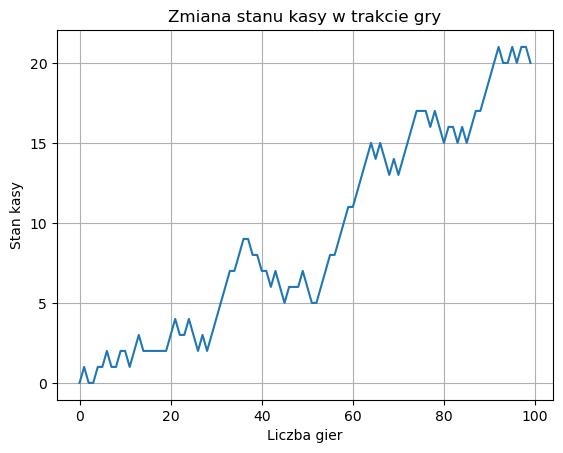

In [79]:
plt.plot(money, linestyle='-')
plt.xlabel("Liczba gier")
plt.ylabel("Stan kasy")
plt.title("Zmiana stanu kasy w trakcie gry")
plt.grid(True)
plt.show()